# Recognizing one 7 segment display digit
### input are values of 7 segments of the digital display. Output is a binary representation of the number shown.
![7 segment display to binary](7 to BCD.png "task at hand")

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Activation, Lambda
from keras import optimizers
import keras.callbacks as cb
from keras.layers.normalization import BatchNormalization
from IPython.display import SVG

Using TensorFlow backend.


**input and output data**

In [2]:
zer = [1,1,1,1,1,1,0]
one = [0,1,1,0,0,0,0]
two = [1,1,0,1,1,0,1]
thr = [1,1,1,1,0,0,1]
fou = [0,1,1,0,0,1,1]
fiv = [1,0,1,1,0,1,1]
six = [1,0,1,1,1,1,1]
sev = [1,1,1,0,0,0,0]
eig = [1,1,1,1,1,1,1]
nin = [1,1,1,1,0,1,1]
eij = [1,1,1,0,1,1,1] #A
bee = [0,0,1,1,1,1,1] #b
see = [1,0,0,1,1,1,0] #C
dee = [0,1,1,1,1,0,1] #d
eee = [1,0,0,1,1,1,1] #E
eff = [1,0,0,0,1,1,1] #F
inp=[zer, one, two, thr, fou, fiv, six, sev, eig, nin, eij, bee, see, dee, eee, eff]
out=[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],[1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],[1,1,0,0],[1,1,0,1],[1,1,1,0],[1,1,1,1]]

X_df=pd.DataFrame(inp,columns=['l1','l2','l3','l4','l5','l6','l7'])
X_df
Y_df=pd.DataFrame(out,columns=['b0','b1','b2','b3'])
Y_df
print(X_df.shape, Y_df.shape)
X=X_df.values
Y=Y_df.values

(16, 7) (16, 4)


**early stop when binary accuracy gets to 100%**

In [34]:
class EarlyStop(cb.Callback):
    def on_epoch_end(self, epoch, logs={}):
        # print(logs)
        
        if logs['binary_accuracy']>0.99:
            print("binary accuracy loss made it early stop at epoch: ",  epoch)
            self.model.stop_training = True

callbacks = [
    EarlyStop()
]



**actual NN model**

In [35]:
model = Sequential()
L1=Dense( units=7, input_shape=(7,), activation='relu')
model.add(L1)
L2=Dense(units=4, activation='sigmoid') 
model.add(L2)
model.compile(loss="binary_crossentropy",optimizer=optimizers.Adam(lr=0.05), metrics=['accuracy','binary_accuracy','mae'] )
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 32        
Total params: 88
Trainable params: 88
Non-trainable params: 0
_________________________________________________________________


** train. it will run at most 10000 epochs **

In [36]:
epochs=10000
hist = model.fit(X, Y, epochs=epochs,  verbose=0, shuffle=True, callbacks=callbacks)#,batch_size=8)

binary accuracy loss made it early stop at epoch:  379


** check how training went **

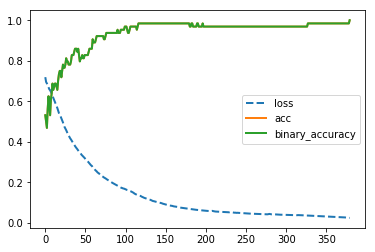

In [37]:
epochs_done=len(hist.history['acc'])
x = np.linspace(0,epochs_done-1,epochs_done)
plt.plot(x, hist.history['loss'], '--', linewidth=2, label='loss')
plt.plot(x, hist.history['acc'], '-', linewidth=2, label='acc')
# plt.plot(x, hist.history['mean_absolute_error'], '-', linewidth=2, label='mae')
plt.plot(x, hist.history['binary_accuracy'], '-', linewidth=2, label='binary_accuracy')
plt.legend()
plt.show()

** compare to truth. All lines should end with Yay! **

In [38]:
pred = model.predict(inp)
for co,i in enumerate(pred):
    c=[]
    for j in i:
        if j>0.5: c.append(1)
        else: c.append(0)
    if c==out[co]: 
        st="Yay!"
    else:
        st="Nay"
    print(["{0:0.2f}".format(n) for n in i], c, out[co], st)

['0.48', '0.00', '0.00', '0.00'] [0, 0, 0, 0] [0, 0, 0, 0] Yay!
['0.04', '0.02', '0.00', '1.00'] [0, 0, 0, 1] [0, 0, 0, 1] Yay!
['0.00', '0.00', '1.00', '0.00'] [0, 0, 1, 0] [0, 0, 1, 0] Yay!
['0.00', '0.01', '1.00', '1.00'] [0, 0, 1, 1] [0, 0, 1, 1] Yay!
['0.00', '1.00', '0.00', '0.00'] [0, 1, 0, 0] [0, 1, 0, 0] Yay!
['0.00', '1.00', '0.01', '1.00'] [0, 1, 0, 1] [0, 1, 0, 1] Yay!
['0.01', '1.00', '0.99', '0.01'] [0, 1, 1, 0] [0, 1, 1, 0] Yay!
['0.03', '0.97', '1.00', '1.00'] [0, 1, 1, 1] [0, 1, 1, 1] Yay!
['0.91', '0.05', '0.00', '0.00'] [1, 0, 0, 0] [1, 0, 0, 0] Yay!
['0.66', '0.02', '0.00', '0.99'] [1, 0, 0, 1] [1, 0, 0, 1] Yay!
['1.00', '0.00', '1.00', '0.01'] [1, 0, 1, 0] [1, 0, 1, 0] Yay!
['1.00', '0.00', '1.00', '1.00'] [1, 0, 1, 1] [1, 0, 1, 1] Yay!
['0.99', '0.98', '0.04', '0.00'] [1, 1, 0, 0] [1, 1, 0, 0] Yay!
['1.00', '1.00', '0.01', '1.00'] [1, 1, 0, 1] [1, 1, 0, 1] Yay!
['1.00', '1.00', '0.99', '0.00'] [1, 1, 1, 0] [1, 1, 1, 0] Yay!
['1.00', '1.00', '1.00', '0.99'] [1, 1, 